In [ ]:
# Connecting spreadsheet to Colab notebook

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
import pandas as pd
import os

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Open spreadsheet and transfer data

import pandas as pd
import os

#url = "https://docs.google.com/spreadsheets/d/1r9qTAWrgrN6YX2PFJ7pkOLpAIXfLeVVKOgrxfOQtdlg/edit?usp=sharing"
#df = pd.read_csv(url)

#check if the spreadsheet opened right
try:
  sh = gc.open_by_url("https://docs.google.com/spreadsheets/d/1r9qTAWrgrN6YX2PFJ7pkOLpAIXfLeVVKOgrxfOQtdlg/edit?usp=sharing")
  print("Spreadsheet opened properly", sh.title)
except Exception as e:
  print("Spreadsheet did not open correctly: {e}", sh.title)

#check if we can get data from our spreadsheet
try:
  rows = sh.get_all_values()
  print(rows)
except AttributeError as e:
  print("Data not accessed: {e}")

Spreadsheet opened properly Copy of AI Challenge Dataset
Data not accessed: {e}


In [ ]:
worksheet = sh.worksheet('AI Challenge Dataset')
rows = worksheet.get_all_values()

df = pd.DataFrame.from_records(rows)

df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,brand_id,review_id,review_dating_by_category,ai_aspect,ai_sentiment,avg_rating,is_product_recommended,review_content,is_anonymous,like_count,display_name
1,00411460f7c92d2124a67ea0f4cb5f85,2598,"[{""id"":9946,""review_id"":2598,""rating_score"":5,...",,,5,TRUE,"Basically, stick to the peanut butter ones. Th...",,0,Snacks
2,00411460f7c92d2124a67ea0f4cb5f85,3718,"[{""id"":15114,""review_id"":3718,""rating_score"":5...",,,5,TRUE,"We do carry it, but we're currently out of sto...",TRUE,,Snacks
3,00411460f7c92d2124a67ea0f4cb5f85,3719,"[{""id"":15125,""review_id"":3719,""rating_score"":4...",,,4,TRUE,"We do carry Whims chocolate, but we haven’t or...",TRUE,,Snacks
4,00411460f7c92d2124a67ea0f4cb5f85,2004,"[{""id"":7561,""review_id"":2004,""rating_score"":5,...",,,5,TRUE,Very good. All the flavors are selling fast. I...,FALSE,0,Snacks


In [ ]:
cols = list(df.columns)
print(cols)

df = df.rename(columns={0: 'brand_id', 1: 'review_id', 2: 'review_dating_by_category', 3: 'ai_aspect', 4: 'ai_sentiment', 5: 'avg_rating', 6: 'is_product_recommended', 7: 'review_content', 8: 'is_anonymous', 9: 'like_count', 10: 'display_name'})
new_cols = list(df.columns)
print(new_cols)

df = df.drop(axis=0, index=0)

df.head()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['brand_id', 'review_id', 'review_dating_by_category', 'ai_aspect', 'ai_sentiment', 'avg_rating', 'is_product_recommended', 'review_content', 'is_anonymous', 'like_count', 'display_name']


,brand_id,review_id,review_dating_by_category,ai_aspect,ai_sentiment,avg_rating,is_product_recommended,review_content,is_anonymous,like_count,display_name
1,00411460f7c92d2124a67ea0f4cb5f85,2598,"[{""id"":9946,""review_id"":2598,""rating_score"":5,...",,,5,TRUE,"Basically, stick to the peanut butter ones. Th...",,0,Snacks
2,00411460f7c92d2124a67ea0f4cb5f85,3718,"[{""id"":15114,""review_id"":3718,""rating_score"":5...",,,5,TRUE,"We do carry it, but we're currently out of sto...",TRUE,,Snacks
3,00411460f7c92d2124a67ea0f4cb5f85,3719,"[{""id"":15125,""review_id"":3719,""rating_score"":4...",,,4,TRUE,"We do carry Whims chocolate, but we haven’t or...",TRUE,,Snacks
4,00411460f7c92d2124a67ea0f4cb5f85,2004,"[{""id"":7561,""review_id"":2004,""rating_score"":5,...",,,5,TRUE,Very good. All the flavors are selling fast. I...,FALSE,0,Snacks
5,00411460f7c92d2124a67ea0f4cb5f85,3717,"[{""id"":15113,""review_id"":3717,""rating_score"":4...",,,4,TRUE,"We still carry Whims, and it's selling well. A...",TRUE,,Snacks


In [ ]:
df = df.dropna()

df = df.dropna(how='all')
df = df.dropna(axis=1)
df = df.dropna(axis=1, how='all')

df.head()

,brand_id,review_id,review_dating_by_category,ai_aspect,ai_sentiment,avg_rating,is_product_recommended,review_content,is_anonymous,like_count,display_name
1,00411460f7c92d2124a67ea0f4cb5f85,2598,"[{""id"":9946,""review_id"":2598,""rating_score"":5,...",,,5,TRUE,"Basically, stick to the peanut butter ones. Th...",,0,Snacks
2,00411460f7c92d2124a67ea0f4cb5f85,3718,"[{""id"":15114,""review_id"":3718,""rating_score"":5...",,,5,TRUE,"We do carry it, but we're currently out of sto...",TRUE,,Snacks
3,00411460f7c92d2124a67ea0f4cb5f85,3719,"[{""id"":15125,""review_id"":3719,""rating_score"":4...",,,4,TRUE,"We do carry Whims chocolate, but we haven’t or...",TRUE,,Snacks
4,00411460f7c92d2124a67ea0f4cb5f85,2004,"[{""id"":7561,""review_id"":2004,""rating_score"":5,...",,,5,TRUE,Very good. All the flavors are selling fast. I...,FALSE,0,Snacks
5,00411460f7c92d2124a67ea0f4cb5f85,3717,"[{""id"":15113,""review_id"":3717,""rating_score"":4...",,,4,TRUE,"We still carry Whims, and it's selling well. A...",TRUE,,Snacks


In [ ]:
import pandas as pd
import json

df_sub = df[['review_dating_by_category']]
df_sub['review_dating_by_category'] = df_sub['review_dating_by_category'].apply(json.loads)
df_exploded = df_sub.explode('review_dating_by_category').reset_index(drop=True)
df_normalized = pd.json_normalize(df_exploded['review_dating_by_category'])
df_final = df_normalized[['id', 'review_id', 'rating_score', 'rating_category']]

df_final.head()

<ipython-input-134-4a8adf0a69e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['review_dating_by_category'] = df_sub['review_dating_by_category'].apply(json.loads)


,id,review_id,rating_score,rating_category
0,9946,2598,5.0,rating_shipping
1,9945,2598,5.0,rating_service
2,9947,2598,5.0,rating_price
3,9944,2598,5.0,rating_quality
4,15114,3718,5.0,rating_packaging


In [ ]:
df_pivot_by_review_id = df_final.pivot_table(index='review_id', columns='rating_category', values='rating_score', aggfunc='first').reset_index()
df_pivot_by_review_id.fillna(0, inplace=True)
df_pivot_by_review_id.head()

rating_category,review_id,rating_packaging,rating_price,rating_quality,rating_service,rating_shipping,rating_taste
0,1547,5.0,5.0,5.0,5.0,5.0,5.0
1,1548,4.0,3.0,3.0,4.0,4.0,3.0
2,1549,4.0,4.0,4.0,4.0,4.0,4.0
3,1550,4.0,4.0,4.0,4.0,4.0,4.0
4,1551,4.0,4.0,4.0,4.0,4.0,4.0


In [ ]:
df.head()

,brand_id,review_id,review_dating_by_category,ai_aspect,ai_sentiment,avg_rating,is_product_recommended,review_content,is_anonymous,like_count,display_name
1,00411460f7c92d2124a67ea0f4cb5f85,2598,"[{""id"":9946,""review_id"":2598,""rating_score"":5,...",,,5,TRUE,"Basically, stick to the peanut butter ones. Th...",,0,Snacks
2,00411460f7c92d2124a67ea0f4cb5f85,3718,"[{""id"":15114,""review_id"":3718,""rating_score"":5...",,,5,TRUE,"We do carry it, but we're currently out of sto...",TRUE,,Snacks
3,00411460f7c92d2124a67ea0f4cb5f85,3719,"[{""id"":15125,""review_id"":3719,""rating_score"":4...",,,4,TRUE,"We do carry Whims chocolate, but we haven’t or...",TRUE,,Snacks
4,00411460f7c92d2124a67ea0f4cb5f85,2004,"[{""id"":7561,""review_id"":2004,""rating_score"":5,...",,,5,TRUE,Very good. All the flavors are selling fast. I...,FALSE,0,Snacks
5,00411460f7c92d2124a67ea0f4cb5f85,3717,"[{""id"":15113,""review_id"":3717,""rating_score"":4...",,,4,TRUE,"We still carry Whims, and it's selling well. A...",TRUE,,Snacks


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1iCqOx85IvWICKyaoNISh3eaMzkAO7CutONQnSIjyybM#gid=0


In [ ]:
reviews = df[['review_id', 'review_content']]
reviews.head()

,review_id,review_content
1,2598,"Basically, stick to the peanut butter ones. Th..."
2,3718,"We do carry it, but we're currently out of sto..."
3,3719,"We do carry Whims chocolate, but we haven’t or..."
4,2004,Very good. All the flavors are selling fast. I...
5,3717,"We still carry Whims, and it's selling well. A..."


### EXAMPLE

Index(['brand_id', 'review_id', 'review_dating_by_category', 'ai_aspect',
       'ai_sentiment', 'avg_rating', 'is_product_recommended',
       'review_content', 'is_anonymous', 'like_count', 'display_name'],
      dtype='object')


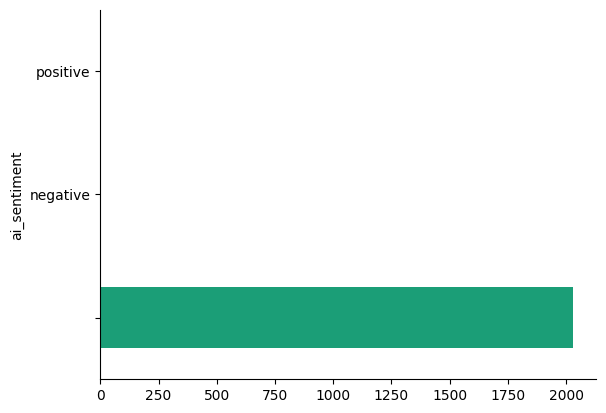

In [ ]:
# @title ai_sentiment

from matplotlib import pyplot as plt
import seaborn as sns

print(df.columns)

df.groupby('ai_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from textblob import TextBlob

# Keywords for each category
categories = {
    "packaging": ["box", "wrap", "sealed", "secure", "unbox", "durable", "protection", "crushed", "damaged", "eco-friendly", "attractive", "design", "aesthetic", "compact", "loose", "bubble wrap", "lightweight", "faulty", "tampered", "presentation", "package"],
    "quality": ["durable", "sturdy", "poorly made", "quality"],
    "taste": ["flavor", "delicious", "bland", "taste"],
    "service": ["customer support", "helpful", "rude", "service"],
    "shipping": ["delayed", "on time", "broken", "transit"],
    "price": ["affordable", "expensive", "worth", "value"]
}

def categorize_review(review):
    scores = {category: 0 for category in categories}

    # Check for keywords in each category
    for category, keywords in categories.items():
        if any(keyword in review.lower() for keyword in keywords):
            analysis = TextBlob(review)
            scores[category] = analysis.sentiment.polarity  # Sentiment score (-1 to 1)

    # Normalize scores to a 1-5 scale
    normalized_scores = {k: (v + 1) * 2 + 1 for k, v in scores.items()}
    return normalized_scores

#Process all reviews
df_reviews = pd.DataFrame({
    'review_content': ["The packaging was secure and beautiful, but the price felt too high for the quality.",
                       "The taste was amazing, and it arrived on time.",
                       "The service was helpful, but the packaging was damaged."]
})

df_reviews['categorized_scores'] = df_reviews['review_content'].apply(categorize_review)

# Explode the scores into separate columns
categorized_df = pd.json_normalize(df_reviews['categorized_scores'])
df_reviews = pd.concat([df_reviews, categorized_df], axis=1)

print(df_reviews)

#fucntion call
review = "The packaging was secure and beautiful, but the price felt too high for the quality."
print(categorize_review(review))

                                      review_content  \
0  The packaging was secure and beautiful, but th...   
1     The taste was amazing, and it arrived on time.   
2  The service was helpful, but the packaging was...   

                                  categorized_scores  packaging  quality  \
0  {'packaging': 3.94, 'quality': 3.94, 'taste': ...       3.94     3.94   
1  {'packaging': 3, 'quality': 3, 'taste': 4.2, '...       3.00     3.00   
2  {'packaging': 3.0, 'quality': 3, 'taste': 3, '...       3.00     3.00   

   taste  service  shipping  price  
0    3.0      3.0       3.0      3  
1    4.2      3.0       4.2      3  
2    3.0      3.0       3.0      3  
{'packaging': 3.94, 'quality': 3.94, 'taste': 3, 'service': 3, 'shipping': 3, 'price': 3}


In [ ]:
rankings = []

for review in reviews['review_content']:
  rankings.append(categorize_review(review))

print(reviews['review_content'][14])
print(rankings[14])

Sauz has sold really well in our store. The packaging is eye-catching and the ingredients really seal the deal. Our employees are also obsessed with Sauz, we have tried all of the flavors and love them! The price point hasn't been an issue, it is quite a large jar so you can get multiple uses out of it. 
{'packaging': 3, 'quality': 3.5619791666666667, 'taste': 3.5619791666666667, 'service': 3, 'shipping': 3, 'price': 3}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

reviews_list = []

for review in reviews['review_content']:
    reviews_list.append(review)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(reviews_list)

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

In [ ]:
cluster_dict = {}
for review, label in zip(reviews_list, labels):
    cluster_dict.setdefault(label, []).append(review)

for cluster, reviews in cluster_dict.items():
    print(f"Cluster {cluster}")
    print(f"Review 0: {reviews[0]}")
    print(f"Review 1: {reviews[1]}")

Cluster 2
Review 0: Basically, stick to the peanut butter ones. The other flavors, they're terrible. Peanut butter ones, bestsellers - big bags, small bag, doesn't matter. The other ones sold, but they took a little while to sell out. But the peanut butter cup, sometimes I would get two cases of each every week, so they go up fast. As a seller, I would love to get more promo prices, but from the customers, no complaints. Sometimes the big bags, maybe a little bit too pricey because we sell it for $8.99. Maybe if the cost price could go down for a little bit, it would be more appealing.
Review 1: It sells pretty well, I would say fairly average for like a candy kind of chocolate treat.
Cluster 1
Review 0: We do carry it, but we're currently out of stock. It's selling very well, so much so that we need to place a new order. It's selling out quickly, which is why we're out right now. At the moment, we only have one flavor available, but if we get approval for additional flavors, we’re ope

Topic Modeling

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
import nltk

# Ensure required NLTK resources are downloaded
nltk.download('stopwords')

# Preprocessing function
def preprocess_text(text):
    import re
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing
df_reviews['cleaned_reviews'] = df_reviews['review_content'].apply(preprocess_text)

# Convert reviews to a bag-of-words representation
vectorizer = CountVectorizer(
    max_df=0.95,  # Ignore terms appearing in more than 95% of documents
    min_df=2,     # Ignore terms appearing in less than 2 documents
    max_features=5000,  # Limit the number of unique words
    stop_words='english'  # Remove English stopwords
)
X = vectorizer.fit_transform(df_reviews['cleaned_reviews'])

# Fit an LDA model
n_topics = 6  # Adjust the number of topics
lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    learning_method='batch',  # Use batch learning
    max_iter=20  # Increase the number of iterations
)
lda.fit(X)

# Extract topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words-1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
packaging
Topic 1:
packaging
Topic 2:
packaging
Topic 3:
packaging
Topic 4:
packaging
Topic 5:
packaging


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NER Training with spaCy

In [ ]:
import spacy
from spacy.training import Example

# Load a blank spaCy model
nlp = spacy.blank("en")

# Add the NER pipeline component
ner = nlp.add_pipe("ner")

# Define the training data
TRAIN_DATA = [
    ("The packaging was secure.", {"entities": [(4, 13, "CATEGORY")]}),
    ("The price was too high.", {"entities": [(4, 9, "CATEGORY")]}),
    ("The service was amazing.", {"entities": [(4, 11, "CATEGORY")]}),
]

# Add labels to the NER component
for _, annotations in TRAIN_DATA:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

# Disable other components in the pipeline during training
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]

# Training the NER model
import random
from spacy.training import Example

with nlp.disable_pipes(*unaffected_pipes):
    optimizer = nlp.begin_training()
    for i in range(20):  # Number of iterations
        random.shuffle(TRAIN_DATA)
        losses = {}
        batches = spacy.util.minibatch(TRAIN_DATA, size=2)
        for batch in batches:
            examples = [Example.from_dict(nlp.make_doc(text), annotations) for text, annotations in batch]
            nlp.update(examples, drop=0.5, losses=losses)
        print(f"Losses at iteration {i}: {losses}")

# Test the NER model
test_text = "The packaging was attractive and the service was helpful."
doc = nlp(test_text)
print("Entities:", [(ent.text, ent.label_) for ent in doc.ents])

Losses at iteration 0: {'ner': 13.118757605552673}
Losses at iteration 1: {'ner': 11.75500875711441}
Losses at iteration 2: {'ner': 10.477610290050507}
Losses at iteration 3: {'ner': 8.701382786035538}
Losses at iteration 4: {'ner': 6.943178087472916}
Losses at iteration 5: {'ner': 5.925054460763931}
Losses at iteration 6: {'ner': 5.155499875545502}
Losses at iteration 7: {'ner': 5.225744307041168}
Losses at iteration 8: {'ner': 4.516471695154905}
Losses at iteration 9: {'ner': 4.147980093141086}
Losses at iteration 10: {'ner': 4.854207244468853}
Losses at iteration 11: {'ner': 4.933935635141097}
Losses at iteration 12: {'ner': 3.636918959207833}
Losses at iteration 13: {'ner': 3.668696803972125}
Losses at iteration 14: {'ner': 3.1303345932392403}
Losses at iteration 15: {'ner': 2.2330295303836465}
Losses at iteration 16: {'ner': 2.1291774692945182}
Losses at iteration 17: {'ner': 1.3514173866715282}
Losses at iteration 18: {'ner': 1.1483344739535823}
Losses at iteration 19: {'ner': 0.